<a href="https://colab.research.google.com/github/xementor/AlgoDaily/blob/main/map_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  YOLOv3 on PASCAL VOC 

In [ ]:
# for mxnet
!pip install --upgrade mxnet
# for pytorch
!pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

!pip install --upgrade gluoncv

In [ ]:
import gluoncv as gcv
from gluoncv.data import VOCDetection
# typically we use 2007+2012 trainval splits for training data
train_dataset = VOCDetection(splits=[(2007, 'trainval'), (2012, 'trainval')])
# and use 2007 test as validation data
val_dataset = VOCDetection(splits=[(2007, 'test')])

print('Training images:', len(train_dataset))
print('Validation images:', len(val_dataset))

## selecti test data

In [84]:
image , label = val_dataset[0]
image.shape
bboxes = label[:, :4]
cids = label[:, 4:5 ]
print(bboxes[0])
val_dataset.classes[int(cids[0])]

[ 47. 239. 194. 370.]


'dog'

In [ ]:
train_image, train_label = train_dataset[60]
bboxes = train_label[:, :4]
print(bboxes)
cids = train_label[:, 4:5]
train_dataset.classes[int(cids[-1])]

# train_dataset.classes[cids.view()]
# print('image:', train_image.shape)
# print('bboxes:', bboxes.shape, 'class ids:', cids.shape)

# graph a photo

## Now train dataset

In [ ]:
train_image, train_label = train_dataset[60]
bboxes = train_label[:, :4]
cids = train_label[:, 4:5]
print('image:', train_image.shape)
print('bboxes:', bboxes.shape, 'class ids:', cids.shape)

image: (500, 334, 3)
bboxes: (6, 4) class ids: (6, 1)


## Predict with gluon

In [22]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

## A model form gluon

In [ ]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)
# net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

In [173]:

im_fname = '/content/VOCdevkit/VOC2007/JPEGImages/003169.jpg'
print(im_fname)
x, img = data.transforms.presets.yolo.load_test(im_fname)
print('Shape of pre-processed image:', x.shape)

/content/VOCdevkit/VOC2007/JPEGImages/003169.jpg
Shape of pre-processed image: (1, 3, 416, 555)


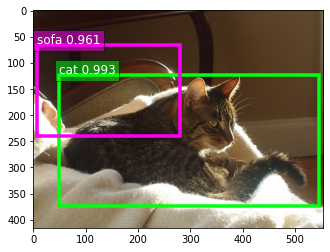

In [174]:
class_IDs, scores, bounding_boxs = net(x)
class_IDs.dtype

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

## detect object.

In [ ]:
import os
# assign directory
directory = '/content/VOCdevkit/100img'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
      write_one_result(filename,directory)
    

In [190]:
def write_one_result(filename,path):
  
  im_fname = os.path.join(directory, filename)
  filename = os.path.splitext(filename)[0]
  print(im_fname)
  print(filename)
  # im_fname = "{}/{}.jpg".format(path,filename)
  x, img = data.transforms.presets.yolo.load_test(im_fname)
  class_IDs, scores, bounding_boxs = net(x)
  classids = class_IDs.asnumpy()
  id_list = classids.tolist();

  scores_list = scores.asnumpy().tolist();
  bounding_boxs = bounding_boxs.asnumpy();



  classes = []
  for id in id_list[0]:
    if id[0] != -1:
      net.classes[int(id[0])]
      classes.append(net.classes[int(id[0])])
  # ids = [x for x in classids if x != -1]

  # for i in range(len(classes)):
  #   print(score_list[0][i][0])

  # for i in range(3):
  #   print(bounding_boxs[0][i])
  # print(classes)

  def write_a_class(i):
    def boxes_str(boxs):
      res = ""
      for ax in boxs:
        res = res + "{} ".format(ax)
      return res;


    with open('/content/res/{}.txt'.format(filename), 'a') as f:
        f.write("{} ".format(classes[i]))
        sc = score_list[0][i][0]
        if sc == -1:
          print('- found')
          sc = 0

        f.write("{} ".format(str(sc)))
        f.write("{}".format(boxes_str(bounding_boxs[0][i])))
        f.write("\n")

  for i in range(len(classes)):
    write_a_class(i)



In [154]:
path = "/content/VOCdevkit/VOC2007/JPEGImages";
write_one_result('000004',path)

In [ ]:
x, img = data.transforms.presets.yolo.load_test(x, short=512)
class_IDs, scores, bounding_boxs = net(x)
class_IDs.dtype

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()


In [ ]:
from gluoncv.data.transforms import presets
from gluoncv import utils
from mxnet import nd

In [ ]:
width, height = 416, 416  # resize image to 416x416 after all data augmentation
train_transform = presets.yolo.YOLO3DefaultTrainTransform(width, height)
val_transform = presets.yolo.YOLO3DefaultValTransform(width, height)

In [ ]:
utils.random.seed(123)  # fix seed in this tutorial

In [ ]:
train_image2, train_label2 = train_transform(train_image, train_label)
print('tensor shape:', train_image2.shape)

tensor shape: (3, 416, 416)


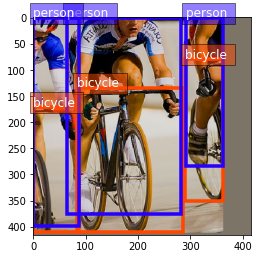

In [ ]:
train_image2 = train_image2.transpose((1, 2, 0)) * nd.array((0.229, 0.224, 0.225)) + nd.array((0.485, 0.456, 0.406))
train_image2 = (train_image2 * 255).clip(0, 255)
ax = viz.plot_bbox(train_image2.asnumpy(), train_label2[:, :4],
                   labels=train_label2[:, 4:5],
                   class_names=train_dataset.classes)
plt.show()

In [ ]:
from gluoncv.data.batchify import Tuple, Stack, Pad
from mxnet.gluon.data import DataLoader

batch_size = 2  
num_workers = 0 

# behavior of batchify_fn: stack images, and pad labels
batchify_fn = Tuple(Stack(), Pad(pad_val=-1))
train_loader = DataLoader(train_dataset.transform(train_transform), batch_size, shuffle=True,
                          batchify_fn=batchify_fn, last_batch='rollover', num_workers=num_workers)
val_loader = DataLoader(val_dataset.transform(val_transform), batch_size, shuffle=False,
                        batchify_fn=batchify_fn, last_batch='keep', num_workers=num_workers)

for ib, batch in enumerate(train_loader):
    if ib > 3:
        break
    print('data 0:', batch[0][0].shape, 'label 0:', batch[1][0].shape)
    print('data 1:', batch[0][1].shape, 'label 1:', batch[1][1].shape)

In [ ]:
from gluoncv import model_zoo
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained_base=False)



In [ ]:
import mxnet as mx
x = mx.nd.zeros(shape=(1, 3, 416, 416))
net.initialize()
cids, scores, bboxes = net(x)

In [ ]:
loss = gcv.loss.YOLOV3Loss()

print(net._loss)

YOLOV3Loss(batch_axis=0, w=None)


In [ ]:
from mxnet import autograd
train_transform = presets.yolo.YOLO3DefaultTrainTransform(width, height, net)

batchify_fn = Tuple(*([Stack() for _ in range(6)] + [Pad(axis=0, pad_val=-1) for _ in range(1)]))
train_loader = DataLoader(train_dataset.transform(train_transform), batch_size, shuffle=True,
                          batchify_fn=batchify_fn, last_batch='rollover', num_workers=num_workers)

for ib, batch in enumerate(train_loader):
    if ib > 0:
        break
    print('data:', batch[0][0].shape)
    print('label:', batch[6][0].shape)
    with autograd.record():
        input_order = [0, 6, 1, 2, 3, 4, 5]
        obj_loss, center_loss, scale_loss, cls_loss = net(*[batch[o] for o in input_order])
        

data: (3, 416, 416)
label: (4, 4)


# Downloadin gdata from voc

In [ ]:
!wget "http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar"


In [2]:
!wget "http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar"

VOCtest_06-Nov-2007 100%[===================>] 430.13M  31.7MB/s    in 15s     

2022-06-09 08:15:50 (29.4 MB/s) - ‘VOCtest_06-Nov-2007.tar’ saved [451020800/451020800]



In [ ]:
!wget "http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar"

In [ ]:
!wget "http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/semantic_contours/benchmark.tgz"

## unpack tar 

In [ ]:
!git clone https://github.com/Cartucho/mAP

In [ ]:
!tar -xvf /content/VOCtest_06-Nov-2007.tar

In [ ]:
!tar -xvf /content/VOCtrainval_06-Nov-2007.tar

In [ ]:
!tar -xvf /content/VOCtrainval_11-May-2012.tar

In [ ]:
!tar -xvf /content/benchmark.tgz

## place this dat in the mxnet root folder

In [10]:
!mkdir ~/.mxnet
!mkdir ~/.mxnet/datasets
!mkdir ~/.mxnet/datasets/voc


In [11]:
!cp -rf /content/VOCdevkit/* ~/.mxnet/datasets/voc

In [ ]:
!ls ~/.mxnet/datasets/voc

### mAP calculate

In [ ]:
!python /content/mAP/main.py

## moving anotatin file.

In [16]:
!ls /content/VOCdevkit/VOC2007/Annotations | wc -l

9963


other utility

In [17]:
!cp -rf /content/VOCdevkit/VOC2007/Annotations /content/

In [ ]:
!python /content/mAP/scripts/extra/convert_gt_xml.py


In [193]:
!cp -rf /content/mAP/input/ground-truth /content/drive/MyDrive/

In [192]:
!cp -rf /content/res /content/drive/MyDrive

In [181]:
!cd /content/VOCdevkit/VOC2007/JPEGImages/ && cp $(ls  | head -n 100) /content/VOCdevkit/100img/

In [183]:
# /content/VOCdevkit/VOC2007/Annotations
!cd /content/VOCdevkit/VOC2007/Annotations && cp $(ls  | head -n 100) /content/mAP/input/ground-truth

In [ ]:
!cd /drive && ls

In [ ]:
!python /content/mAP/scripts/extra/convert_gt_xml.py